In [1]:
import nibabel as nib #pip install nibabel
import h5py #pip install h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from scipy.spatial import ConvexHull
import json

In [2]:
sub1fa = pd.read_csv('../subject1/sub1fa', header=None).T

In [3]:
sub1md = pd.read_csv('../subject1/sub1md', header=None).T # Transpose so that each column is a bundle/fiber-group:

In [4]:
f = h5py.File('../subject1/MoriGroups_Cortex_clean_D5_L4.mat', 'r')

In [5]:
fg = f['fg']

In [6]:
fibers = f['fg']['fibers']

In [7]:
# There are 20 fiber groups (which are equivalent to the number of columns in sub1fa/sub1md!)
fibers.shape
print (fibers.size)

20


In [8]:
# Select one of them:
bundle_idx = 8
# Dereferencing HDF5 files is weird:
bundle = np.array(f[fibers[bundle_idx][0]])

In [9]:
# There are 2614 streamlines in this bundle:
bundle.shape

(1, 628)

In [15]:
# Select one of these:
streamline_idx = 20
streamline = np.array(f[bundle[0][streamline_idx]])
json_streamline = json.dumps({streamline_idx:streamline.tolist()})
jump_step = 5
json_streamlines = {}
json_bundles = {}
# loop through all fibers 
for bundle_idx in range(fibers.size):
    bundle = np.array(f[fibers[bundle_idx][0]])
    # loop through the selected bundle and put all lines into another variable
    for streamline_idx in range(0, bundle.size, jump_step):
        streamline = np.array(f[bundle[0][streamline_idx]])
        streamline = streamline[1::5]
        json_streamlines[streamline_idx] = streamline.tolist()
    
    # then put this fiber into bundles set
    json_bundles[bundle_idx] = json_streamlines
    # and refresh json_streamlines
    json_streamlines = {}
    
# print (len(json_bundles))
# finally, write this bundles set into external file
with open('data.json', 'w') as outfile:
    json.dump(json_bundles, outfile)

#     json_streamline = json.dumps({streamline_idx:streamline.tolist()})
# for streamline_idx in bundle:
#     print (streamline_idx)

# print(len(json_streamlines))

# print (json_streamline)
# print (streamline.tolist())

[[-40.99696887  44.36848141  14.18987484]
 [-40.84827472  43.55600103  13.62653155]
 [-40.69231992  42.76350381  13.03716909]
 ..., 
 [ 57.25479228 -24.82466718  -5.48613807]
 [ 57.41285474 -23.90806093  -5.84915703]
 [ 57.94756116 -23.11751024  -5.9859415 ]]
[-40.99696887 -40.84827472 -40.69231992 ...,  57.25479228  57.41285474
  57.94756116]


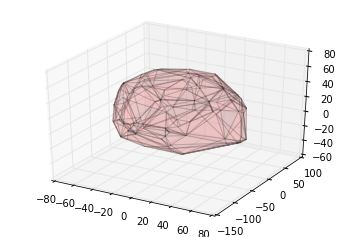

In [23]:
# Plot 100 of these:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
bundle_points = np.empty((0,3))
for bundle_idx in range(20):
    bundle = np.array(f[fibers[bundle_idx][0]])
    for streamline_idx in range(100):
        streamline = np.array(f[bundle[0][streamline_idx]])
        bundle_points = np.vstack((bundle_points, streamline))
#         ax.plot(streamline[:, 0], streamline[:, 1], streamline[:, 2], alpha=0.5, color='blue')

print(bundle_points)

cv = ConvexHull(bundle_points)
x = cv.points[:,0]
print (x)
y = cv.points[:,1]
z = cv.points[:,2]
ax.plot_trisurf(x, y, z, triangles=cv.simplices, alpha=0.1, color='red')

In [14]:
# Reading the data from the MRI data file is a bit more straightforward:
T1w_img = nib.load('../subject1/T1w_acpc_dc_restore_1.25.nii.gz')
T1w_data = T1w_img.get_data()

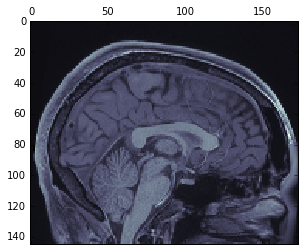

In [15]:
# This is a view through the middle of this persons head ("mid-sagittal"). 
plt.matshow(np.rot90(T1w_data[T1w_data.shape[0]//2]), cmap='bone')